In [1]:
import pandas as pd
import torch
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('twitter_training.csv', names = ['id', 'entity', 'sentiment', 'text'])
df = df[['entity', 'sentiment', 'text']]
df

,entity,sentiment,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df_val = pd.read_csv('twitter_validation.csv', names = ['id', 'entity', 'sentiment', 'text'])
df_val = df_val[['entity', 'sentiment', 'text']]
df_val

,entity,sentiment,text
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     74682 non-null  object
 1   sentiment  74682 non-null  object
 2   text       73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

entity         0
sentiment      0
text         686
dtype: int64

In [6]:
df.dropna(inplace=True)
df_val.dropna(inplace=True)

In [7]:
df['sentiment'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

In [8]:
df_val['sentiment'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: sentiment, dtype: int64

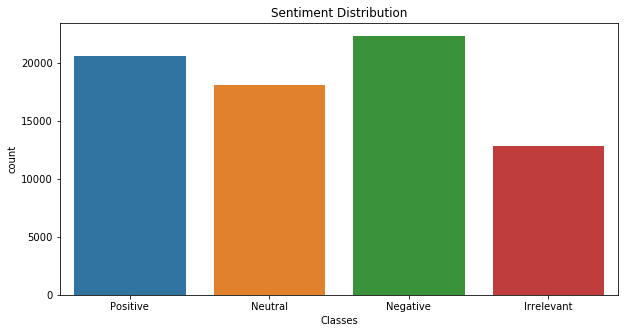

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
sns.countplot(x=df['sentiment'])
plt.xlabel('Classes')
plt.title('Sentiment Distribution')
plt.show()

In [10]:
label_dict = {}
for index, sentiment in enumerate(df['sentiment'].unique()):
    label_dict[sentiment] = index
label_dict

{'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Irrelevant': 3}

In [11]:
df['label'] = df['sentiment'].replace(label_dict)
df_val['label'] = df_val['sentiment'].replace(label_dict)
df.head()

,entity,sentiment,text,label
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,0
1,Borderlands,Positive,I am coming to the borders and I will kill you...,0
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,0
3,Borderlands,Positive,im coming on borderlands and i will murder you...,0
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0


In [12]:
df_val.head()

,entity,sentiment,text,label
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,3
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,1
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,2
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",2
4,Google,Neutral,Now the President is slapping Americans in the...,1


In [13]:
df = df.sample(frac=1)
df_val = df_val.sample(frac=1)
df

,entity,sentiment,text,label
34593,Fortnite,Irrelevant,Big Picture For Deadpool ».. store.playstation...,3
48031,HomeDepot,Neutral,A car rolled off a parking lot and over an emb...,1
44817,Verizon,Negative,RhandlerR Verizon playing the biggest games o...,2
32417,LeagueOfLegends,Neutral,entire Age of Legends toxic? (please know i’m ...,1
28214,ApexLegends,Negative,@ PlayApex please help! After the hotfix for t...,2
...,...,...,...,...
31487,LeagueOfLegends,Positive,i have ever dreamed i are scoring league of ho...,0
20581,WorldOfCraft,Positive,My beloved main character from World of Warcra...,0
55478,CallOfDuty,Neutral,"Tried cod today, how can people play with it? ...",1
20864,WorldOfCraft,Neutral,"I've just earned ""Horrible Bosses""!",1


In [14]:
X_train = df.drop(['label'], axis=1)
y_train = df['label'].values

X_val = df_val.drop(['label'], axis=1)
y_val = df_val['label'].values

In [15]:
X_train.head()

,entity,sentiment,text
34593,Fortnite,Irrelevant,Big Picture For Deadpool ».. store.playstation...
48031,HomeDepot,Neutral,A car rolled off a parking lot and over an emb...
44817,Verizon,Negative,RhandlerR Verizon playing the biggest games o...
32417,LeagueOfLegends,Neutral,entire Age of Legends toxic? (please know i’m ...
28214,ApexLegends,Negative,@ PlayApex please help! After the hotfix for t...


In [16]:
y_train

array([3, 1, 2, ..., 1, 1, 1])

In [17]:
from tqdm import tqdm as tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [18]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)

In [19]:
encoded_data_train = tokenizer.batch_encode_plus(X_train['text'].values,
                                                 add_special_tokens = True,
                                                 return_attention_mask = True,
                                                 pad_to_max_length = True,
                                                 max_length = 280,
                                                 return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/sebastian/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [20]:
encoded_data_val = tokenizer.batch_encode_plus(X_val['text'].values,
                                                 add_special_tokens = True,
                                                 return_attention_mask = True,
                                                 pad_to_max_length = True,
                                                 max_length = 280,
                                                 return_tensors = 'pt')

In [21]:
encoded_data_train

{'input_ids': tensor([[  101,  2502,  3861,  ...,     0,     0,     0],
        [  101,  1037,  2482,  ...,     0,     0,     0],
        [  101,  1054, 11774,  ...,     0,     0,     0],
        ...,
        [  101,  2699, 19429,  ...,     0,     0,     0],
        [  101,  1045,  1005,  ...,     0,     0,     0],
        [  101,  1026,  4895,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [22]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train)

In [23]:
#encode train set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_val)

In [24]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [25]:
print(len(dataset_train))
print(len(dataset_val))

73996
1000


# Get Pretrained BERT Model

In [26]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Create Data Loaders

In [27]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) 

# Optimizer and Scheduler

In [28]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5, eps = 1e-8)

/home/sebastian/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [29]:
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = len(dataloader_train)*epochs)

# Performance Metrics

In [30]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [31]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [32]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

# Training

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [35]:
for epoch in range(1, epochs+1):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    
    for batch in dataloader_train:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        #progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    #tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    #tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    #tqdm.write(f'Validation loss: {val_loss}')
    #tqdm.write(f'F1 Score (weighted): {val_f1}')
    print(f'Loss Epoch {epoch} Train: {loss_train_avg}, Val F1 Score: {val_f1}')

100%|██████████| 32/32 [00:04<00:00,  7.63it/s]


Loss Epoch 1 Train: 0.8433271738065256, Val F1 Score: 0.8639567160139138


100%|██████████| 32/32 [00:04<00:00,  7.62it/s]


Loss Epoch 2 Train: 0.4027197831591239, Val F1 Score: 0.9519861446768466


100%|██████████| 32/32 [00:04<00:00,  7.62it/s]


Loss Epoch 3 Train: 0.20994188574069758, Val F1 Score: 0.9619234791258834


100%|██████████| 32/32 [00:04<00:00,  7.62it/s]


Loss Epoch 4 Train: 0.13702985365126233, Val F1 Score: 0.9659288189672368


100%|██████████| 32/32 [00:04<00:00,  7.65it/s]


Loss Epoch 5 Train: 0.10240704245821768, Val F1 Score: 0.965019794335435


100%|██████████| 32/32 [00:04<00:00,  7.65it/s]


Loss Epoch 6 Train: 0.08233311846778521, Val F1 Score: 0.9699852613855737


100%|██████████| 32/32 [00:04<00:00,  7.65it/s]


Loss Epoch 7 Train: 0.06786266711940107, Val F1 Score: 0.9669435212074127


100%|██████████| 32/32 [00:04<00:00,  7.65it/s]


Loss Epoch 8 Train: 0.05904138748482109, Val F1 Score: 0.9679960936272713


100%|██████████| 32/32 [00:04<00:00,  7.65it/s]


Loss Epoch 9 Train: 0.053072778988064805, Val F1 Score: 0.962934394785291


100%|██████████| 32/32 [00:04<00:00,  7.65it/s]

Loss Epoch 10 Train: 0.0493705910306866, Val F1 Score: 0.9649525605414218


# Evaluation

In [36]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)
#get accuracy score
accuracy_per_class(predictions, true_vals)

100%|██████████| 32/32 [00:04<00:00,  7.66it/s]

Class: Positive
Accuracy:271/277

Class: Neutral
Accuracy:273/285

Class: Negative
Accuracy:261/266

Class: Irrelevant
Accuracy:160/172



# Saving the Model

In [37]:
torch.save(model.cpu().state_dict(), 'model.pt')